 # Predicting the house prices using KC_house_data set.



In [ ]:
#importing required libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# raw link for data set.
url ="https://raw.githubusercontent.com/BhargavPalaketi/MachineLearning/main/SupervisedLearning/Regression/Multivariate%20Regression/Datasets/kc_house_data.csv"
data = pd.read_csv(url)
print(data.shape)
data.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
 # describing the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


 ### Finding the correlation between the features

In [ ]:
correlated_features = set ()
correlation_matrix = data.corr()
correlation_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


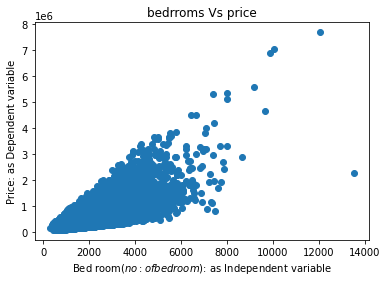

In [ ]:
plt.plot(data['sqft_living'],data['price'],'o')
plt.xlabel('Bed room$(no:of bedroom)$: as Independent variable')
plt.ylabel('Price: as Dependent variable')
plt.title('bedrroms Vs price');

In [ ]:
data = data.drop(['id','date'],axis=1)

## Using Gradient descent python implementation

In [ ]:
X_g = data.drop(['price','sqft_lot','floors','zipcode','lat','yr_built','yr_renovated','sqft_basement','sqft_living','view','long','sqft_above'],axis=1)
#X_g = data.iloc[:,df.columns != ['price','sqft_lot','floors']]
y_g = data['price']
print(X_g.shape)
X_g.head(10)

(21613, 7)


,bedrooms,bathrooms,waterfront,condition,grade,sqft_living15,sqft_lot15
0,3,1.00,0,3,7,1340,5650
1,3,2.25,0,3,7,1690,7639
2,2,1.00,0,3,6,2720,8062
3,4,3.00,0,5,7,1360,5000
4,3,2.00,0,3,8,1800,7503
5,4,4.50,0,3,11,4760,101930
6,3,2.25,0,3,7,2238,6819
7,3,1.50,0,3,7,1650,9711
8,3,1.00,0,3,7,1780,8113
9,3,2.50,0,3,7,2390,7570


In [ ]:
from sklearn.model_selection import train_test_split
X_g_train,X_g_test,y_g_train,y_g_labels = train_test_split(X_g,y_g,random_state = 0 )

In [ ]:
#initialising weight vector
theta = np.ones([X_g.shape[1]+1,1],dtype='float64')
# appending X_0 as ones to training and testing data
X_g_train_0 = np.c_[np.ones((X_g_train.shape[0],1)),X_g_train]
X_g_test_0 = np.c_[np.ones((X_g_test.shape[0],1)),X_g_test]
theta.shape

(8, 1)

In [ ]:
print(X_g_train.shape)
print(X_g_train_0.shape)
print(y_g_train.shape)

(16209, 7)
(16209, 8)
(16209,)


In [ ]:
print(theta.size)

8


In [ ]:
def hypothesis(X,theta):
  f = np.sum(np.matmul(X,theta))
  return f

In [ ]:
def costfunction(X,y,theta):
  m = X.shape[0]
  j = 1/(2*m)*np.sum(np.square(np.subtract(hypothesis(X,theta),y)))
  return j

In [ ]:
cost = costfunction(X_g_train_0,y_g_train,theta)
cost

2.8891854906041256e+16

In [ ]:
def Linear_reg_gradient_descent(X,y,alpha,epoch,theta):
  m = X.shape[0] # size of training set
  n = X.shape[1] # no:of independent variables
  

  cost = np.ones(epoch)
  for i in range(0,epoch):
    theta[0] = theta[0] - (alpha/X.shape[0])*np.sum(np.subtract(hypothesis(X,theta),y))
    for j in range(1,n):
       theta[j] = theta[j] - (alpha/X.shape[0])*np.sum(np.subtract(hypothesis(X,theta),y)*X[:,j])
    cost[i] = costfunction(X,y,theta)
  return cost,theta                                          
                                              

   

In [ ]:
cost,theta = Linear_reg_gradient_descent(X_g_train_0,y_g_train,0.001,2000,theta)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in matmul
  


In [ ]:
theta

array([[             inf],
       [ 8.48360824e+284],
       [-9.76001840e+286],
       [ 2.65070942e+286],
       [ 1.12458254e+289],
       [-4.73018308e+291],
       [ 1.16577875e+297],
       [            -inf]])

In [ ]:
cost

array([1.06757119e+072, 3.94467855e+127, 1.45755983e+183, ...,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000])

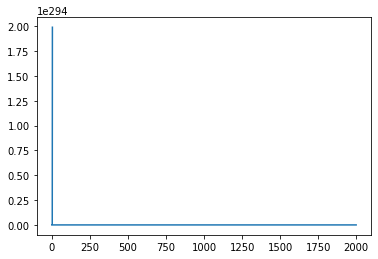

In [ ]:
plt.plot(cost)

 ## Model building using SKlearn

In [ ]:
df = data
data.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
## sampling the data

X = df.iloc[:,df.columns != 'price']
y = df['price']

In [ ]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


 ### spliting the data set

In [ ]:
from sklearn.model_selection import train_test_split
#X_train,y_train,X_test,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print("Shape of X ",X_train.shape)
print("Shape of y",y_train.shape)

Shape of X  (15129, 18)
Shape of y (15129,)


In [ ]:
# Using Lasso regression
from sklearn.linear_model import Lasso
l1_reg = Lasso(alpha = 0.01,max_iter=10000).fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 272403278294242.2, tolerance: 202270218611.5126
  positive)


In [ ]:
# Using Rigdge regression
from sklearn.linear_model import Ridge
l2_reg = Ridge(alpha = 0.01, max_iter=1000).fit(X_train,y_train)

In [ ]:
# using Linear Regrssion model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.metrics.regression import r2_score
ridge_loss = l1_reg.score(X_test,y_test)
print(ridge_loss)

0.6877907526726603


In [ ]:
# Performance evaluation
from sklearn.metrics.regression import r2_score
lasso_score = l1_reg.score(X_test,y_test)
ridge_score = l2_reg.score(X_test,y_test)
regressor_score = regressor.score(X_test,y_test)
print('Lasso model score: ',lasso_score)
print('Ridge model score: ',ridge_score)
print('Linar Regression model score: ',regressor_score)

Lasso model score:  0.6877904446624703
Ridge model score:  0.6877904446624703
Linar Regression model score:  0.6877902899299173


In [ ]:
l2_reg.coef_

array([-3.11943100e+04,  3.70364954e+04,  1.06421113e+02,  2.38747434e-01,
        1.20281997e+04,  5.91454572e+05,  5.34947180e+04,  2.65776479e+04,
        9.57194730e+04,  6.48919094e+01,  4.16965297e+01, -2.58202292e+03,
        1.60387872e+01, -5.25137777e+02,  6.06411298e+05, -2.05308331e+05,
        2.88415176e+01, -4.77599019e-01])

 ### Removing correlated features

In [ ]:
for i in range(len(correlation_matrix.columns)):
  for j in range(i ):
    if abs(correlation_matrix.iloc[i,j])>0.8:
      col_name = correlation_matrix.columns[i]
      correlated_features.add(col_name)

In [ ]:
print(correlated_features)

{'sqft_above'}


In [ ]:
train_features,test_features,train_labels,test_labels = train_test_split(X,y,test_size=0.3,random_state=0)
train_features.shape

(15129, 18)

In [ ]:
train_features.drop(labels = correlated_features, axis=1, inplace =True)
test_features.drop(labels = correlated_features, axis =1, inplace =True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
train_features.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1468,4,1.50,1390,7200,1.0,0,0,3,7,250,1965,0,98133,47.7224,-122.332,1630,7702
15590,3,1.50,1450,7316,1.0,0,0,3,7,0,1961,0,98133,47.7725,-122.349,1440,7316
18552,5,2.75,2860,5379,2.0,0,0,3,9,0,2005,0,98052,47.7082,-122.104,2980,6018
10535,2,1.00,1050,4125,1.0,0,0,4,7,0,1909,0,98144,47.5736,-122.307,1650,4125
1069,2,1.00,1240,57000,1.0,0,0,3,7,0,1962,0,98075,47.5970,-122.059,3050,25545


In [ ]:
feature_selected_regressor = Lasso(alpha = 0.1, max_iter=1000).fit(train_features,train_labels)
feature_selected_regressor_score = feature_selected_regressor.score(test_features,test_labels)
feature_selected_regressor_score

0.6877902863591818

In [ ]:
regressor2 = LinearRegression()
regressor2.fit(X_train, y_train)
regressor2_score = regressor2.score(X_test,y_test)
regressor2_score

0.6877902899299173